In [1]:
from zlib import adler32
import matplotlib.pyplot as plt
from typing import List
import numpy as np
import pandas as pd
import networkx as nx
import requests

# Задание 1. Чтение графика из файла (0 баллов)

В этом задании мы рассмотрим некоторые основы networkx

In [2]:
url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_adjlist.txt'
open('the_lord_of_the_rings_adjlist.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_edgelist.txt'
open('the_lord_of_the_rings_edgelist.txt', 'wb').write(requests.get(url).content);

Обычным представлением графа является матрица смежности, но многие реальные графы разрежены
(много нулей в матрице смежности), поэтому в большинстве случаев данные хранятся в дешевых разреженных форматах.
1.список ребер
2.список смежности
Список ребер — это список пар узлов — цель и назначение ребер. Вот краевой список интерактивной
сети фильмов "Властелин колец" (2001-2003).

In [3]:
with open('the_lord_of_the_rings_edgelist.txt') as f:
    print(f.read()[:197])

ARAGORN, ELROND
ARAGORN, EOMER
ARAGORN, EOWYN
ARAGORN, GIMLI
ARAGORN, LEGOLAS
ARAGORN, MERRY
ARAGORN, PIPPIN
ARAGORN, THEODEN
ARAGORN, GANDALF
ARAGORN, KING OF THE DEAD
ARWEN, ELROND
BILBO, ELROND



Список смежности — это список списков узлов, где первый узел является корнем, а остальные — листьями.

In [4]:
with open('the_lord_of_the_rings_adjlist.txt') as f:
    print(f.read()[:190])

FRODO, SMEAGOL, GALADRIEL, GANDALF, GORBAG
SMEAGOL, GOLLUM, SAM
GALADRIEL, GANDALF, SAM
GANDALF, GIMLI, LEGOLAS, MERRY, PIPPIN, SAM, SOLDIER, THEODEN, TREEBEARD, IORLAS
GORBAG, SAM, SHAGRAT



В большинстве случаев мы можем использовать данные функции в networkx:
nx.read_adjlist
nx.read_edgelist
nx.read_weighted_edgelist

В дальнейшем задании прочитать графы the_lord_of_the_rings_edgelist.txt,
the_lord_of_the_rings_adjlist.txt и объединить их в один граф так, чтобы
одинаковые узлы были объединены в один узел с сохранением всех смежных ребер
Подсказка: используйте graph.add_edges_from

In [5]:
def read_and_merge_graphs(edgelist_path, adjlist_path):
    
    ad = nx.read_adjlist(adjlist_path, delimiter=', ')
    eg = nx.read_edgelist(edgelist_path, delimiter=', ')

    ad.add_edges_from(eg.edges)
    
    print(ad)
    #print(list(ad.edges(data = True)), '\n\n\n')
    #print(list(ad.nodes(data = True)))
    nx.draw_networkx(ad)
    plt.show()
    
    return ad

Graph with 35 nodes and 98 edges


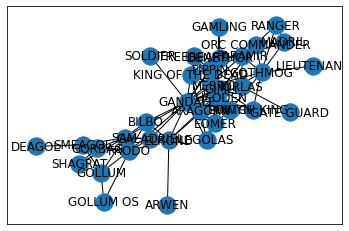

In [6]:
G = read_and_merge_graphs("the_lord_of_the_rings_edgelist.txt",
                          "the_lord_of_the_rings_adjlist.txt")
assert set(G.neighbors('SAM')) == {
    'BILBO',
    'ELROND',
    'FRODO',
    'GALADRIEL',
    'GANDALF',
    'GOLLUM',
    'GORBAG',
    'SHAGRAT',
    'SMEAGOL'}
assert nx.number_of_nodes(G) == 35
assert nx.number_of_edges(G) == 98

# Задание 2. Ориентированные графы (0 баллов)

Направление краев может иметь решающее значение для многих задач, например анализ ссылок. Направленные 
ребра также известны как ссылки или дуги. В networkx тип графа определяется конструктором: 
- nx.Graph для неориентированного графа, 
- nx.DiGraph для ориентированного графа. 

Ориентированный граф может иметь асимметричную матрицу смежности.

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

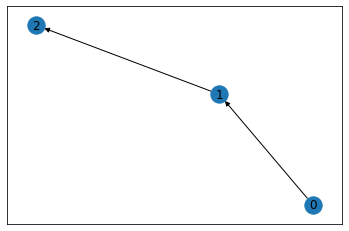

In [7]:
diG = nx.DiGraph()
diG.add_edges_from([[0, 1], [1, 2]])
nx.draw_networkx(diG)
nx.to_numpy_array(diG)

Напишите функцию convert_to_digraph, которая берет неориентированный граф и возвращает новый ориентированный 
граф, направление которого определяется правилом: узел i следует за j, если длина имени i не меньше длины имени j. 
Сохраняйте порядок узлов и имя атрибута узла.

In [8]:
def convert_to_digraph(G):
    # YOUR CODE HERE
    H = nx.DiGraph()
    H.add_nodes_from(G)
    
    for i, j in G.edges:
        if len(G.nodes[i]['name']) > len(G.nodes[j]['name']):
            H.add_edge(i, j)
        elif len(G.nodes[i]['name']) == len(G.nodes[j]['name']):
            H.add_edge(i, j)
            H.add_edge(j, i)
        else:
            H.add_edge(j, i)
            
    for i in G.nodes:
        H.add_node(i, name = G.nodes[i]['name'])

    
#     print(len(H.edges))#кол-во ребер H
    
#     print(list(G.nodes))#номер и порядок точек 
#     print(list(H.nodes))
    
#     print('\n',H.nodes[1]['name'],'\n') #атрибут name точки с номером 1
    
#     print(list(H.edges(data = True)), '\n\n') #данные ребер H
#     print(list(H.nodes(data = True)), '\n\n') #данные узлов H
    
#     print(list(G.edges(data = True)), '\n\n') #данные ребер G
#     print(list(G.nodes(data = True))) #данные узлов G
    
    nx.draw_networkx(H)
    return H

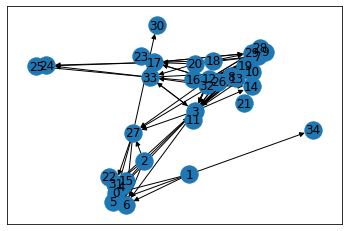

In [9]:
newG = nx.convert_node_labels_to_integers(G, label_attribute='name')
diG = convert_to_digraph(newG)
assert list(diG.nodes) == list(newG.nodes)
for i, j in diG.edges:
    assert len(diG.nodes[i]['name']) >= len(diG.nodes[j]['name'])
assert len(diG.edges) == 117

# Задание 3. Базовая статистика (0 баллов)

Networkx предоставляет простой интерфейс для получения базовой статистики графа (посмотрите в документации, чтобы вспомнить определения):

- nx.radius
- nx.diameter
- nx.average_shortest_path_length
- nx.average_clustering

Например, вот статистика графа путей с 3 узлами:

Radius:  1
Diameter:  2
Average shortest path length:  1.3333333333333333
Average clustering coefficient:  0.0


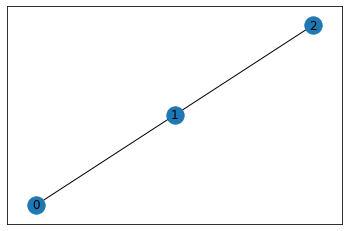

In [10]:
G = nx.path_graph(3)
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)

Ваша задача — построить графики по заданной статистике. Мы можем создать граф, используя простые сетевые интерфейсы. Например, мы можем создать граф, передав список краев.

Radius:  1
Diameter:  1
Average shortest path length:  1.0
Average clustering coefficient:  1.0


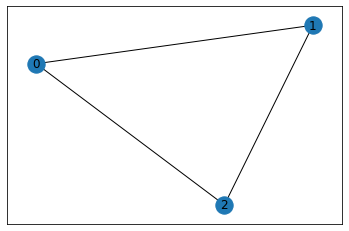

In [11]:
G = nx.Graph([[0, 1], [1, 2], [2, 0]])

print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))

nx.draw_networkx(G)

Или создайте пустой граф, а затем добавляйте ребра одно за другим.

Radius:  1
Diameter:  1
Average shortest path length:  1.0
Average clustering coefficient:  1.0


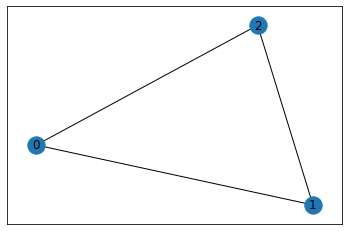

In [12]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 0)

print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))

nx.draw_networkx(G)

Ваша задача — построить графики по заданной статистике.

Напишите функцию graph1, которая возвращает график с радиусом 3 и диаметром 3.

In [13]:
def graph1():
    G = nx.Graph()
    
    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 3)
    G.add_edge(3, 4)
    G.add_edge(4, 5)
    G.add_edge(5, 0)
      
    print('Radius: ', nx.radius(G))
    print('Diameter: ', nx.diameter(G))
    
    return G

Radius:  3
Diameter:  3


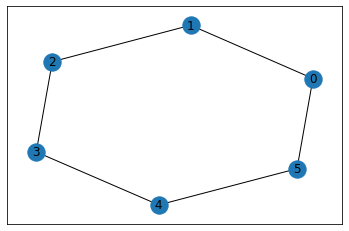

In [14]:
G = graph1()
assert nx.radius(G) == nx.diameter(G) == 3
nx.draw_networkx(G)

Напишите функцию graph2, которая возвращает граф с диаметром не менее 5 средних длин кратчайших путей.

In [15]:
def graph2():
    
    
    G = nx.complete_graph(100)
    
    i=0
    while nx.diameter(G) <= 5 * nx.average_shortest_path_length(G):
        i+=1
        G.add_edge(i, i+1)
    
    print('Diameter: ', nx.diameter(G))
    print('Average shortest path length: ', nx.average_shortest_path_length(G))
    
    return G

Diameter:  7
Average shortest path length:  1.379874213836478


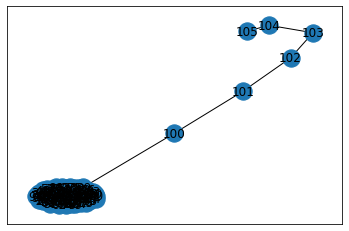

In [16]:
G = graph2()
assert nx.diameter(G) >= 5 * nx.average_shortest_path_length(G)
nx.draw_networkx(G)

Напишите функцию graph3, которая возвращает график со средним коэффициентом кластеризации от 0,1 до 0,11.

In [17]:
def graph3():
    # YOUR CODE HERE
    G = nx.Graph()
    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 0)
    
    i=0
    while 0.1 <= nx.average_clustering(G) >= 0.11:
        i+=1
        G.add_edge(i, i+1)
  
    print('Average clustering coefficient: ', nx.average_clustering(G))
    
    return G

Average clustering coefficient:  0.10606060606060606


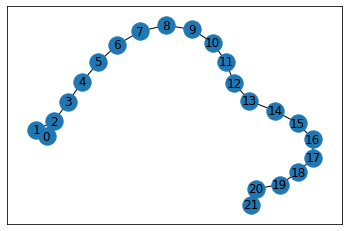

In [18]:
G = graph3()
assert 0.1 <= nx.average_clustering(G) <= 0.11
nx.draw_networkx(G)

# Задание 4. Разметка графика (0 баллов)

Макет графа — это словарь с расположением каждого узла: keys — это nodes, а values  — это позиции x, y. По умолчанию в nx.draw_networkx это пружинный макет — принудительное представление сети, рассматривающей ребра как пружины, удерживающие узлы закрытыми, в то время как узлы обрабатываются как отталкивающие объекты.

In [19]:
G = nx.barabasi_albert_graph(10, 2)
layout = nx.spring_layout(G)
layout

{0: array([ 0.15535224, -0.01502019]),
 1: array([-0.39200052, -0.43427062]),
 2: array([ 0.74221039, -0.39200141]),
 3: array([-0.39308581, -0.01242936]),
 4: array([-0.03754108, -0.47734935]),
 5: array([ 0.82186155, -0.01130306]),
 6: array([-0.54341564,  0.29694984]),
 7: array([-1.        ,  0.21591178]),
 8: array([-0.08283562,  0.46069671]),
 9: array([0.7294545 , 0.36881565])}

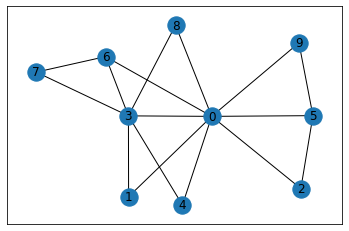

In [20]:
nx.draw_networkx(G, pos=layout)

Макет Kamada Kawai основан на функции стоимости длины пути. Иногда это очень похоже на пружинный макет, однако существенное отличие состоит в том, что пружинный макет является случайным, а Kamada Kawai детерминированным.

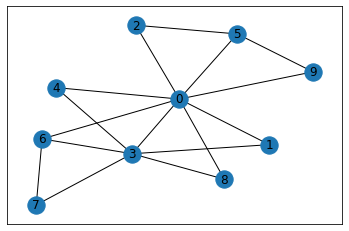

In [21]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)

Круговая компоновка позволяет рисовать граф, в котором узлы расположены по кругу.

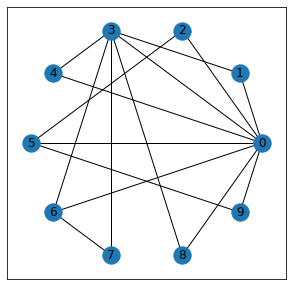

In [22]:
layout = nx.circular_layout(G)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=layout)

Двудольный макет позволяет рисовать двудольный граф.

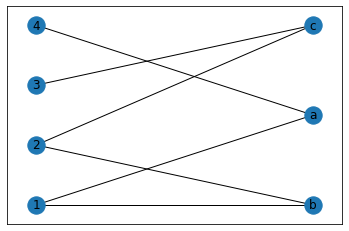

In [23]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
layout = nx.bipartite_layout(B, [1, 2, 3, 4])
nx.draw_networkx(B, pos=layout)

В networkx есть и другие макеты, а также некоторые полезные параметры, которые вы можете найти в документации. Теперь давайте визуализируем сеть появления персонажей в «Матрице» — американском научно-фантастическом боевике 1999 года, написанном и снятом Вачовски. Набор данных взят с https://moviegalaxies.com/.

In [24]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/the_matrix_graph.gexf'
open('the_matrix_graph.gexf', 'wb').write(requests.get(url).content);

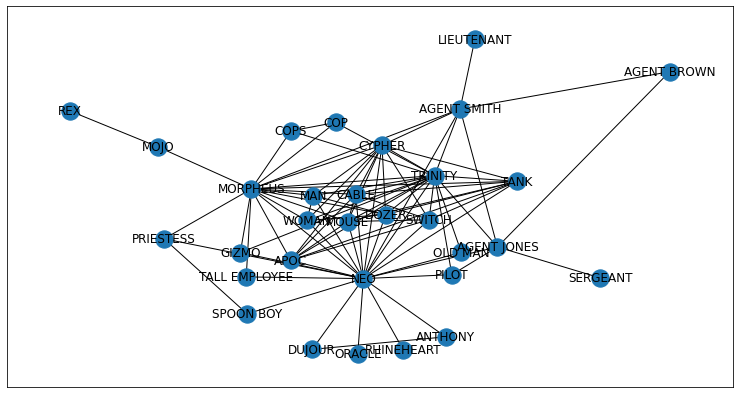

In [25]:
def get_matrix_graph():
    G = nx.read_gexf('the_matrix_graph.gexf')
    mapping = {}
    for node in G.nodes:
        mapping[node] = G.nodes[node]['label']
    G = nx.relabel_nodes(G, mapping)
    return G
matrixG = get_matrix_graph()
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx(matrixG, pos=layout)

Ваша задача — нарисовать матричный граф, используя макет Камада Каваи с нелинейной модификацией, чтобы получить более плотный макет вдали от узла NEO. Определим коэффициент близости с помощью ядра Гаусса

$${coef}(i) = exp(-\frac{{distance}^2}{2\sigma^2})$$

где distance  — это евклидово расстояние от узла до узла NEO, — константа. Затем узлы должны быть перемещены к узлу NEO таким образом, чтобы

$${distance}={coef}(i) \times{distance}$$

Самый простой способ сделать это — центрировать макет так, чтобы узел NEO находился в координатах x=0 y=0, а затем умножить позиции всех узлов на коэффициент близости.

Напишите функцию dense_neo_layout, которая принимает макет, сигму и возвращает новый (плотный) макет.

Подсказка: используйте np.linalg.norm для вычисления евклидовой нормы.

In [26]:
def dense_neo_layout(layout, sigma):
    # YOUR CODE HERE
    new_layout = {}
    
    for node in layout:
        new_layout[node] = layout[node] - layout['NEO'] #центрировать макет так, чтобы узел NEO находился в координатах x=0 y=0
        dist = np.linalg.norm(new_layout[node]) #distance — это евклидово расстояние от узла до узла NEO
        coef_node = np.exp(-(dist**2)/(2 * sigma**2)) #коэффициент близости с помощью ядра Гаусса
        new_layout[node] = coef_node * new_layout[node] #умножить позиции всех узлов на коэффициент близости
    
    return new_layout

In [27]:
layout = nx.kamada_kawai_layout(matrixG)
layout = dense_neo_layout(layout, sigma=1.5)
assert type(layout) == dict
assert np.all(layout['NEO'] == [0, 0])
assert np.all(layout['REX'].round(2) == [-0.67,  0.58])
assert adler32(str(layout['AGENT BROWN'].round(2)[0]).encode()) == 32309448

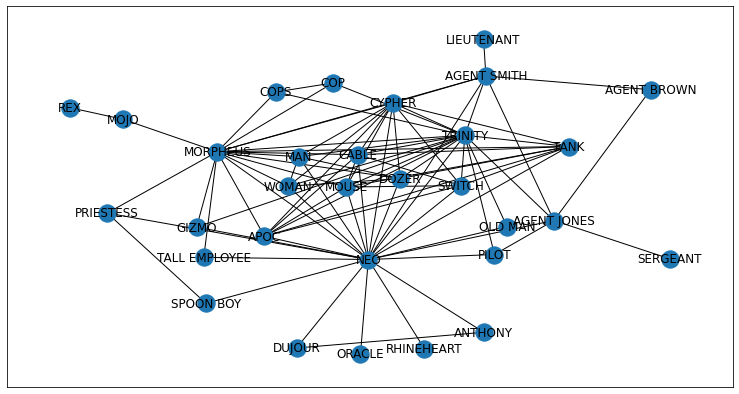

In [28]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(matrixG, layout)

# Задание 5. Визуализация узлов (2 балла)

Мы можем установить размер узла с помощью draw_networkx с параметром node_size. Это должен быть список значений, упорядоченных по G.nodes. Например, рассмотрим простой граф путей.

In [29]:
G = nx.path_graph(3)
G.nodes

NodeView((0, 1, 2))

Установим размер 200 для узла 0, 300 для 1, 400 для 2.

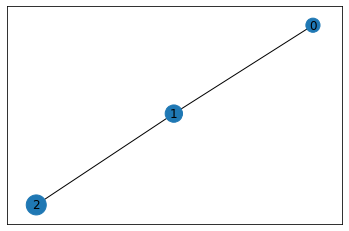

In [30]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, node_size=[200, 300, 400])

Чтобы раскрасить узлы, мы можем использовать node_color. Это должен быть список цветов:
- кортеж значений float RGB 0-1: (red, green, blue)
- кортеж значений float RGBA 0-1: (red, green, blue, alpha)
- строка — название цвета

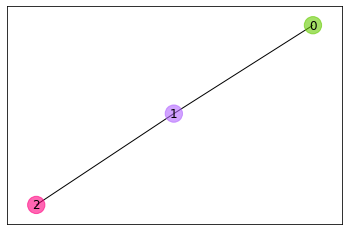

In [31]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[(0.4, 0.8, 0, 0.6), (0.7, 0.4, 1, 0.6), (1, 0, 0.5, 0.6)])

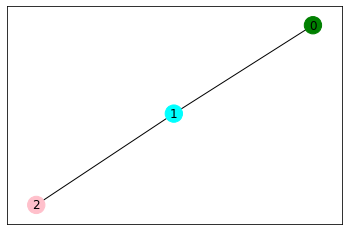

In [32]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=['green', 'cyan', 'pink'])

Также мы можем использовать цвета из цветовых карт matplotlib. Дискретный:

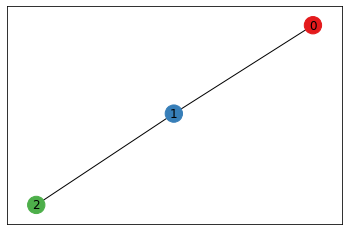

In [33]:
colors = plt.cm.Set1.colors
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[colors[0], colors[1], colors[2]])

Или непрерывный:

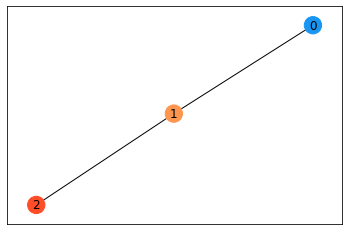

In [34]:
rainbow = plt.cm.rainbow
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[rainbow(0.2), rainbow(0.8), rainbow(0.9)])

Другой вариант окраски узлов — передать список одиночных значений по параметру node_color и colormap по параметру cmap. В этом случае наименьшее значение будет присвоено первому цвету в палитре и наоборот.

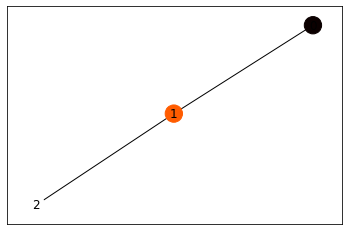

In [35]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3])

Мы можем принудительно установить цветовой диапазон, используя vmin и vmax.

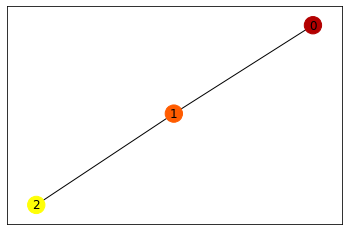

In [36]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3],
    vmin=0, vmax=4)

Мы можем ограничивать узлы, используя параметры edgecolors и linewidths.

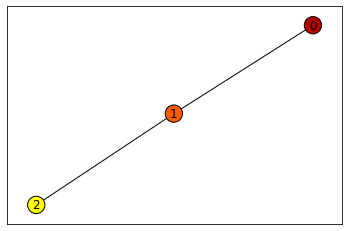

In [37]:
nx.draw_networkx(
    G=G, 
    pos=layout,
    cmap = plt.cm.hot, 
    node_color=[1, 2, 3],
    vmin=0, vmax=4, 
    edgecolors='black', 
    linewidths=1)

Ваша задача настроить размер и цвет узлов в матричном графике, размер и цвет берутся из степени узла и атрибута узла G.nodes[node].

In [38]:
matrixG.nodes['NEO']

{'movie_id': 543,
 'Eccentricity': 3.0,
 'Closeness Centrality': 1.2666666666666666,
 'Betweenness Centrality': 197.97857142857137,
 'Degree': 23,
 'Component ID': 0,
 'Modularity Class': 2,
 'viz': {'color': {'r': 95, 'g': 202, 'b': 190, 'a': 1.0},
  'size': 20.0,
  'position': {'x': -22.198978, 'y': -24.325882, 'z': 0.0}},
 'label': 'NEO'}

Напишите функцию drawing_nodes_params, которая берет график и возвращает словарь с параметрами для nx.draw_networkx в форме {'G': graph, 'node_color': color, ...}. Параметры должны содержать график, макет kamada kawai, цвета узлов из атрибута viz.color. Цвета должны быть преобразованы из диапазона RGB 0–255 в диапазон RGB 0–1. Размер узла представляет собой степень узла G.degree[node], умноженную на 100.

In [39]:
def drawing_nodes_params(graph):
    # YOUR CODE HERE
    
    dict = {'G' : graph,
           'pos' : nx.kamada_kawai_layout(graph),
           'node_color' : [],
           'node_size' : []}    
    
    for i in graph.nodes():
        color = graph.nodes[i]['viz']['color'] 
        size = graph.degree[i]
        
        dict['node_color'].append(np.array([color['r'], color['g'], color['b']])/255)
        dict['node_size'].append(size*100)
#         print(color)
#         print(size)

#     print(dict)
    return dict

In [40]:
matrixG = get_matrix_graph()
params = drawing_nodes_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 200
assert params['node_size'][1] == 600
assert nx.to_numpy_array(params['G']).sum() == 326.0

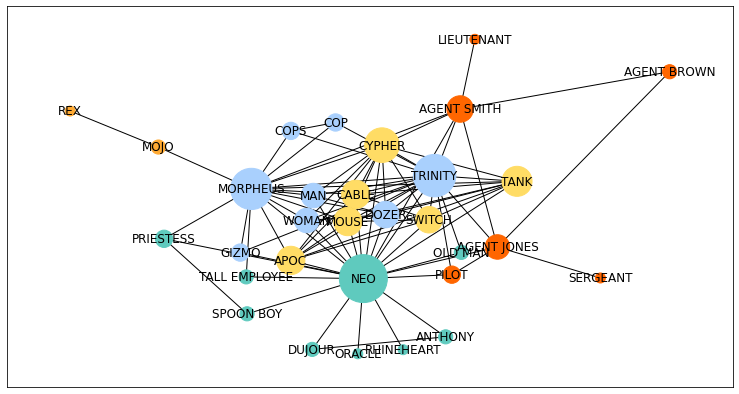

In [41]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

Иногда будет полезно рисовать узлы в нелинейном масштабе. Если мы хотим сделать размеры узлов более сопоставимыми, мы можем использовать полиномиальную или экспоненциальную шкалу. С другой стороны, мы можем использовать логарифмическую шкалу, чтобы сделать размеры более похожими.

Напишите функцию drawing_nodes_polyparams, которая возвращает тот же словарь, что и функция drawing_nodes_params, но размер узла представляет собой сумму степени узла в степени 3 и 10.

$${size} = {degree}^3 + 10$$

In [42]:
def drawing_nodes_polyparams(graph):
    # YOUR CODE HERE
    dict = {'G' : graph,
           'pos' : nx.kamada_kawai_layout(graph),
           'node_color' : [],
           'node_size' : []}    
    
    for i in graph.nodes():
        color = graph.nodes[i]['viz']['color'] 
        size = graph.degree[i]
        
        dict['node_color'].append(np.array([color['r'], color['g'], color['b']])/255)
        dict['node_size'].append(size**3+10)

    return dict

In [43]:
matrixG = get_matrix_graph()
params = drawing_nodes_polyparams(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 18
assert params['node_size'][1] == 226
assert nx.to_numpy_array(params['G']).sum() == 326.0

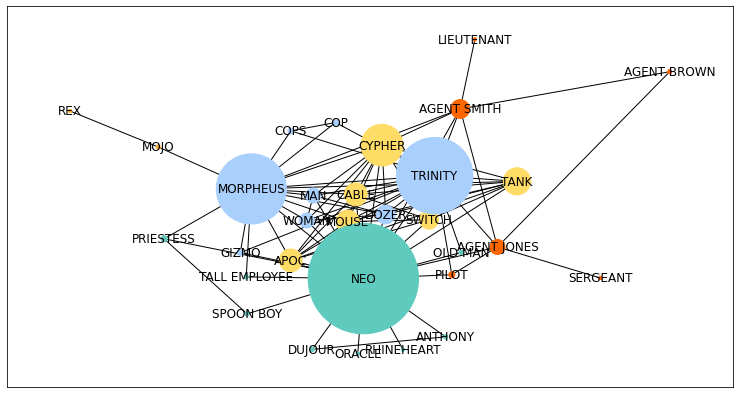

In [44]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

# Задание 6. Распределение степеней (2 балла)

В этой задаче мы попытаемся угадать граф по его распределению степеней.

__Graph A__ описывается гистограммой [0, 2, 10] — 0 узлов степени 0, 2 узла степени 1, 10 узлов степени 2.

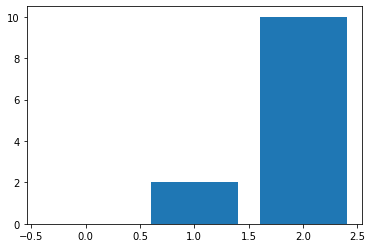

In [45]:
dens_a = [0, 2, 10]
plt.bar(range(len(dens_a)), dens_a);

In [46]:
def generate_graph_a() -> nx.Graph:
    # YOUR CODE HERE    
    G = nx.path_graph(12)
    
    for i in G:
        print(G.degree[i])
        
    return G

1
2
2
2
2
2
2
2
2
2
2
1


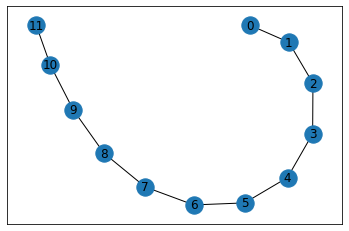

In [47]:
G = generate_graph_a()
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph B__

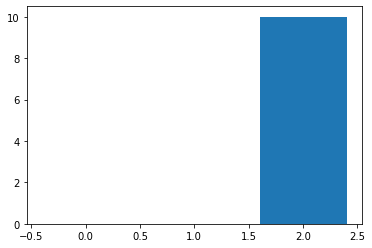

In [48]:
dens_b = [0, 0, 10]
plt.bar(range(len(dens_b)), dens_b);

In [49]:
def generate_graph_b() -> nx.Graph:
    G = nx.Graph()
    
    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 3)
    G.add_edge(3, 4)
    G.add_edge(4, 5)
    G.add_edge(5, 6)
    G.add_edge(6, 7)
    G.add_edge(7, 8)
    G.add_edge(8, 9)
    G.add_edge(9, 0)
    
    for i in G:
        print(G.degree[i])
    
    return G

2
2
2
2
2
2
2
2
2
2


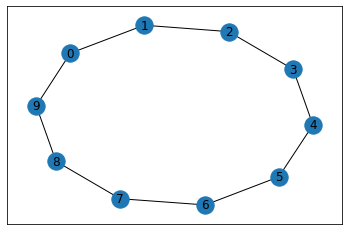

In [50]:
G = generate_graph_b()
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph C__

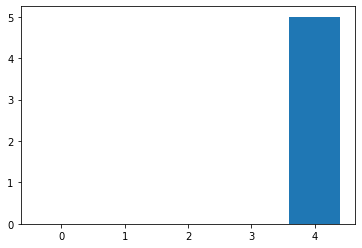

In [51]:
dens_c = [0, 0, 0, 0, 5]
plt.bar(range(len(dens_c)), dens_c);

In [52]:
def generate_graph_c() -> nx.Graph:
    # YOUR CODE HERE
    
    G = nx.complete_graph(5)
    
    for i in G:
        print(G.degree[i])
        
    return G

4
4
4
4
4


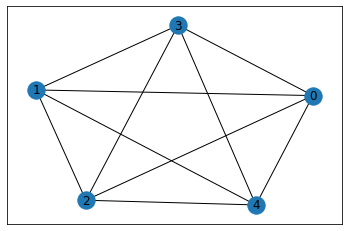

In [53]:
G = generate_graph_c()
assert nx.degree_histogram(G) == dens_c
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph D__

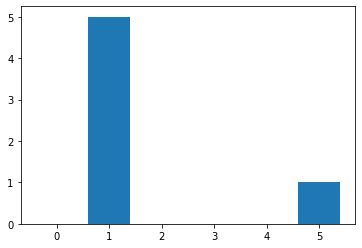

In [54]:
dens_d = [0, 5, 0, 0, 0, 1]
plt.bar(range(len(dens_d)), dens_d);

In [55]:
def generate_graph_d() -> nx.Graph:
    # YOUR CODE HERE
    G = nx.Graph()
    
    G.add_edge(0, 1)
    G.add_edge(0, 2)
    G.add_edge(0, 3)
    G.add_edge(0, 4)
    G.add_edge(0, 5)
    
    for i in G:
        print(G.degree[i])
    
    return G

5
1
1
1
1
1


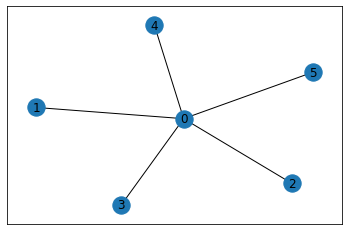

In [56]:
G = generate_graph_d()
assert nx.degree_histogram(G) == dens_d
assert nx.is_connected(G)
nx.draw_networkx(G)

# Задание 7. Степенной закон CDF (2 балла)

Безмасштабная сеть имеет распределение степеней по степенному закону. Рассмотрим это распределение более подробно. PDF степенного закона

$$ p(x) = Cx^{-{\alpha}}$$

где C нормировочная постоянная

$${C = \frac{\alpha - 1}{{x_{\min}}^{-\alpha + 1}}}$$

и ${\alpha}>1$ называется показателем распределения.

In [57]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

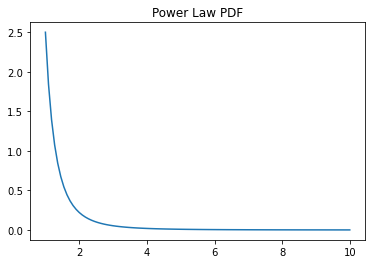

In [58]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_pdf(x_space))
plt.title('Power Law PDF');

Давайте сгенерируем наблюдения из Power Law RV. Первым шагом является получение CDF Powel law: $F(x) = P(X \leq x)$

$$F(x) = 1 - \int_{x}^\infty p(t) dt.$$

Возьмите интеграл, выведите CDF аналитически, а затем напишите функцию power_law_cdf с параметрами x, alpha и x_min.

In [59]:
from scipy import integrate

def power_law_cdf(x, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    
    C = (alpha - 1) / x_min ** (1 - alpha)
    F = 1-((C * x ** (1-alpha))/(alpha-1))
    print(F)
    
    return F

In [60]:
assert power_law_cdf(2, 2, 1) == 0.5
assert power_law_cdf(10, 2, 1) == 0.9
assert adler32(str(power_law_cdf(2, 3, 1)).encode()) == 32571595

0.5
0.9
0.75


[0.         0.19549528 0.34139756 0.45278043 0.53947462 0.60809414
 0.66320983 0.7080554  0.74496622 0.77566    0.80142093 0.8232233
 0.84181616 0.85778231 0.87158029 0.88357444 0.89405699 0.90326433
 0.91138919 0.91858985 0.9249972  0.93072018 0.93584997 0.94046335
 0.94462527 0.948391   0.95180773 0.95491597 0.95775063 0.96034192
 0.96271604 0.96489585 0.96690133 0.96875    0.97045728 0.97203678
 0.97350054 0.97485923 0.97612235 0.97729839 0.9783949  0.97941867
 0.9803758  0.98127175 0.98211146 0.98289939 0.98363958 0.98433567
 0.984991   0.98560858 0.98619116 0.98674125 0.98726115 0.98775294
 0.98821856 0.98865977 0.98907819 0.98947531 0.9898525  0.99021104
 0.99055209 0.99087673 0.99118597 0.99148073 0.99176187 0.99203019
 0.99228644 0.9925313  0.99276541 0.99298937 0.99320375 0.99340906
 0.9936058  0.9937944  0.99397531 0.99414893 0.99431561 0.99447573
 0.9946296  0.99477754 0.99491983 0.99505675 0.99518857 0.99531551
 0.99543782 0.9955557  0.99566936 0.99577899 0.99588477 0.99598

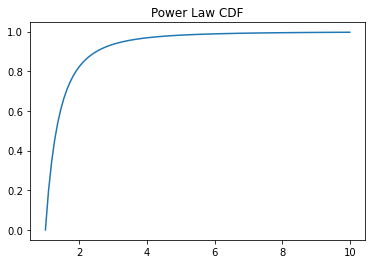

In [61]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_cdf(x_space))
plt.title('Power Law CDF');

# Задание 8. Power law PPF (2 балла)

Позволим $X \sim \text{Power law}$. Далее определим случайную величину ${R}$, где ${R = F(X)}$, поэтому ${R}$ будет равномерно распределен на интервале [0, 1] ([доказательство](https://en.wikipedia.org/wiki/Probability_integral_transform#Proof)). Хорошо, что мы можем легко генерировать равномерно распределенные псевдослучайные числа, а затем преобразовывать их в степенной закон. Найдем выражение для $x = F^{-1}(r)$ , где $r$ — наблюдение из равномерного распределения на интервале [0, 1].

Найдите аналитическую форму $F^{-1}(r)$ и напишите функцию power_law_ppf (функция процентной точки, также известная как квантиль) с параметрами 
- r 
- alpha 
- x_min.

In [62]:
def power_law_ppf(r, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    
    x = (1 - r) ** (-1 / (alpha - 1)) * x_min
    
    return x

In [63]:
assert round(power_law_ppf(0.5, 2, 1), 2) == 2
assert round(power_law_ppf(0.9, 2, 1), 2) == 10
assert adler32(str(round(power_law_ppf(0.96, 3, 1), 2)).encode()) == 19792020

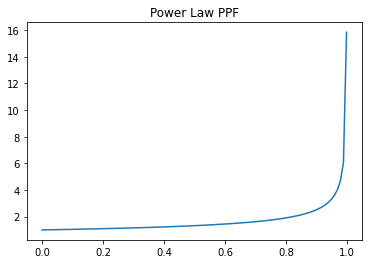

In [64]:
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, power_law_ppf(x_space))
plt.title('Power Law PPF');

Наконец, мы можем получить наблюдение из распределения по степенному закону следующим образом:
- Создайте наблюдение из равномерного распределения на интервале [0, 1]
- Рассчитать значение PPF данного наблюдения

In [65]:
def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

Посмотрите на гистограмму сгенерированного образца

In [66]:
alpha = 3.5
x_min = 1
x_train = power_law_generate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

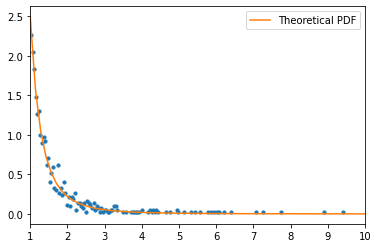

In [67]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()

А вот та же гистограмма в логарифмическом масштабе

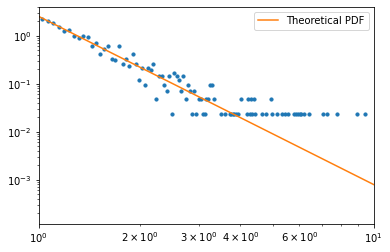

In [68]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

# Задание 9. Оценка альфы при линейном биннинге (2 балла)

Учитывая наблюдения из распределения по степенному закону, попробуйте оценить $\alpha$. Самый простой способ — нарисовать эмпирический PDF с линейным бинированием в логарифмическом масштабе и применить линейную регрессию. Под линейным бинированием мы подразумеваем сохранение фиксированной ширины бина.

Напишите функцию alpha_lin_bins, которая принимает обучающий набор, количество линейных бинов и возвращает оценочное значение $\alpha$.

Подсказки:

- Возьмите бревно с обеих сторон  $p(x) = Cx^{-\alpha}$
- Чтобы рассчитать эмпирический PDF, используйте np.histogram(x_train, bins=bins,density=True)
- Чтобы вычислить псевдообратную матрицу, используйте np.linalg.pinv
- Также вы можете использовать прогноз соответствия в sklearn.linear.LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
def alpha_lin_bins(x_train, bins):
    # YOUR CODE HERE
    hist = np.histogram(x_train, bins, density=True)
    
    xt = hist[0][np.where(hist[0] != 0)]
    xt = np.log(xt / len(x_train))
    
    yb = np.log((hist[1][1:] + hist[1][:-1]) / 2)
    yb = yb[np.where(hist[0] != 0)]
    
    lin_reg = LinearRegression().fit(yb.reshape(-1, 1), xt.reshape(-1, 1))
    print(abs(lin_reg.coef_[-1]), '\n')
    
#     plt.hist(yb, bins, alpha=0.5, label='x')
#     plt.hist(xt, bins, alpha=0.5, label='y')
#     plt.legend(loc='upper right')
#     plt.show()
    
    return abs(lin_reg.coef_[-1])

In [71]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_lin_bins(x_train, bins) - 2) < 0.7
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_lin_bins(x_train, bins) - 3.5) < 0.9
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_lin_bins(x_train, bins) - 10) < 2

[1.33990994] 

[2.67289627] 

[8.15528953] 



[2.67289627] 



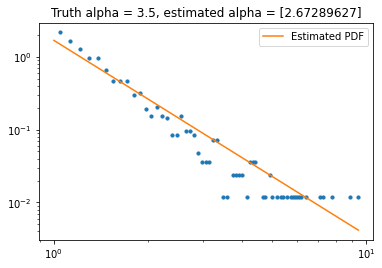

In [72]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_lin_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min), 
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = ' + str(alpha) + ', estimated alpha = ' + str(hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()